In [58]:

# -----------------------------
# 1) 데이터 준비
# -----------------------------

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습 3주차/weather_rainfall.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [59]:
# 결측치 확인

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [60]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [61]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

df = df.copy()

label_encoders = {}
for column in df.columns:
    if df[column].dtype == "object" and column != "Date":  # 문자열/범주형만 변환
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,11/1/2007,0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,11/2/2007,0,14.0,26.9,3.6,4.4,9.7,1,39.0,0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,11/3/2007,0,13.7,23.4,3.6,5.8,3.3,7,85.0,3,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,11/4/2007,0,13.3,15.5,39.8,7.2,9.1,7,54.0,14,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,11/5/2007,0,7.6,16.1,2.8,5.6,10.6,10,50.0,10,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,0,9.0,30.7,0.0,7.6,12.1,6,76.0,10,...,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0
362,10/28/2008,0,7.1,28.4,0.0,11.6,12.7,3,48.0,6,...,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0
363,10/29/2008,0,12.5,19.9,0.0,8.4,5.3,2,43.0,1,...,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0
364,10/30/2008,0,12.5,26.9,0.0,5.0,7.1,7,46.0,11,...,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0


In [62]:
# 컬럼 확인
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

In [63]:
import pandas as pd

# 문자열 → datetime (포맷을 명시해야 안전)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

dates = df["Date"].copy()

# 원하는 숫자형 파생 변수 생성
df["Year"]      = df["Date"].dt.year
df["Month"]     = df["Date"].dt.month
df["Day"]       = df["Date"].dt.day
df["DayOfYear"] = df["Date"].dt.dayofyear  # 연중 몇 번째 날 (1~365)

# 모델 입력에서는 원본 Date는 제거
df = df.drop(columns=["Date"])

In [64]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day,DayOfYear
0,0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,...,7,7,14.4,23.6,0,3.6,2007,11,1,305
1,0,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,...,5,3,17.5,25.7,1,3.6,2007,11,2,306
2,0,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,...,8,7,15.4,20.2,1,39.8,2007,11,3,307
3,0,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,...,2,7,13.5,14.1,1,2.8,2007,11,4,308
4,0,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,...,7,7,11.1,15.4,1,0.0,2007,11,5,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,...,1,3,20.4,30.0,0,0.0,2008,10,27,301
362,0,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,...,0,1,17.2,28.2,0,0.0,2008,10,28,302
363,0,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,...,3,2,14.5,18.3,0,0.0,2008,10,29,303
364,0,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,...,6,7,15.8,25.9,0,0.0,2008,10,30,304


In [65]:
# 레이블

y = df['Rainfall']
y.head()

,Rainfall
0,0.0
1,3.6
2,3.6
3,39.8
4,2.8


In [66]:
# feature와 label 분리
X = df.drop('Rainfall',axis=1)
X.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day,DayOfYear
0,0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,...,7,7,14.4,23.6,0,3.6,2007,11,1,305
1,0,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,...,5,3,17.5,25.7,1,3.6,2007,11,2,306
2,0,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,...,8,7,15.4,20.2,1,39.8,2007,11,3,307
3,0,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,...,2,7,13.5,14.1,1,2.8,2007,11,4,308
4,0,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,...,7,7,11.1,15.4,1,0.0,2007,11,5,309


In [73]:
# 훈련과 테스트 데이터 분리
# 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, dates_train, dates_test=train_test_split (X, y, dates, test_size=0.2,
                                                  shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(262, 25) (262,)
(66, 25) (66,)


In [81]:
# --- 모델 구성 ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성

# --- MSE 계산 ---
mse = mean_squared_error(y_test, ly_preds)
print("MSE:", mean_squared_error(y_test, ly_preds))  #평가
# --- RMSE 직접 계산 (수동) ---
rmse = np.sqrt(mse)
print("RMSE:", rmse)

22.672505804058254
RMSE: 4.761565478291594


/tmp/ipython-input-4073066433.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(dates_test, ly_preds, c="yellow", edgecolors="k",


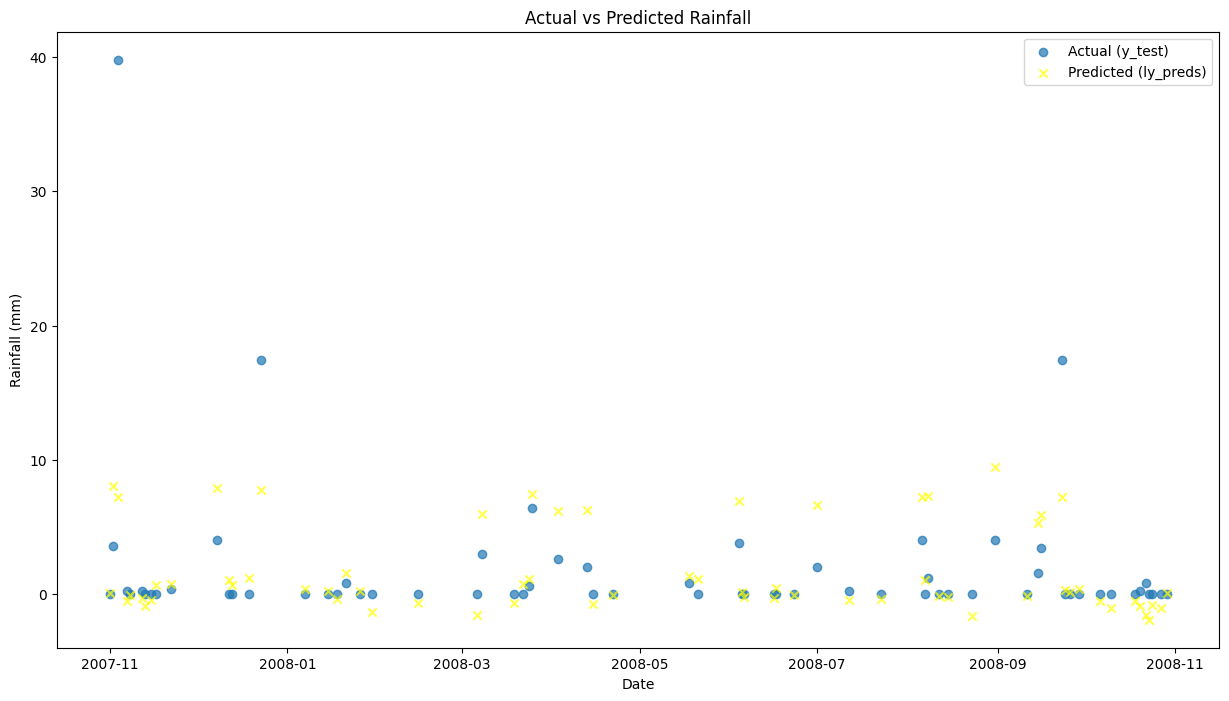

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# --- train/test split에서 dates도 같이 분리했다고 가정 ---
# 예: X_train, X_test, y_train, y_test, dates_train, dates_test

plt.figure(figsize=(15, 8))

# 실제값 (y_test vs dates_test)
plt.scatter(dates_test, y_test, label="Actual (y_test)", alpha=0.7)

# 예측값 (ly_preds vs dates_test)
plt.scatter(dates_test, ly_preds, c="yellow", edgecolors="k",
            label="Predicted (ly_preds)", alpha=0.7, marker="x")

plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")  # 데이터에 맞게 y축 라벨 조정
plt.title("Actual vs Predicted Rainfall")
plt.legend()
plt.show()


In [84]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# --- MSE 계산 ---
mse = mean_squared_error(y_test, ry_preds)
print("MSE(평균제곱근오차):", mean_squared_error(y_test, ry_preds))  #평가
# --- RMSE 직접 계산 (수동) ---
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE(평균제곱근오차): 22.081708727272712
RMSE: 4.699117866927017


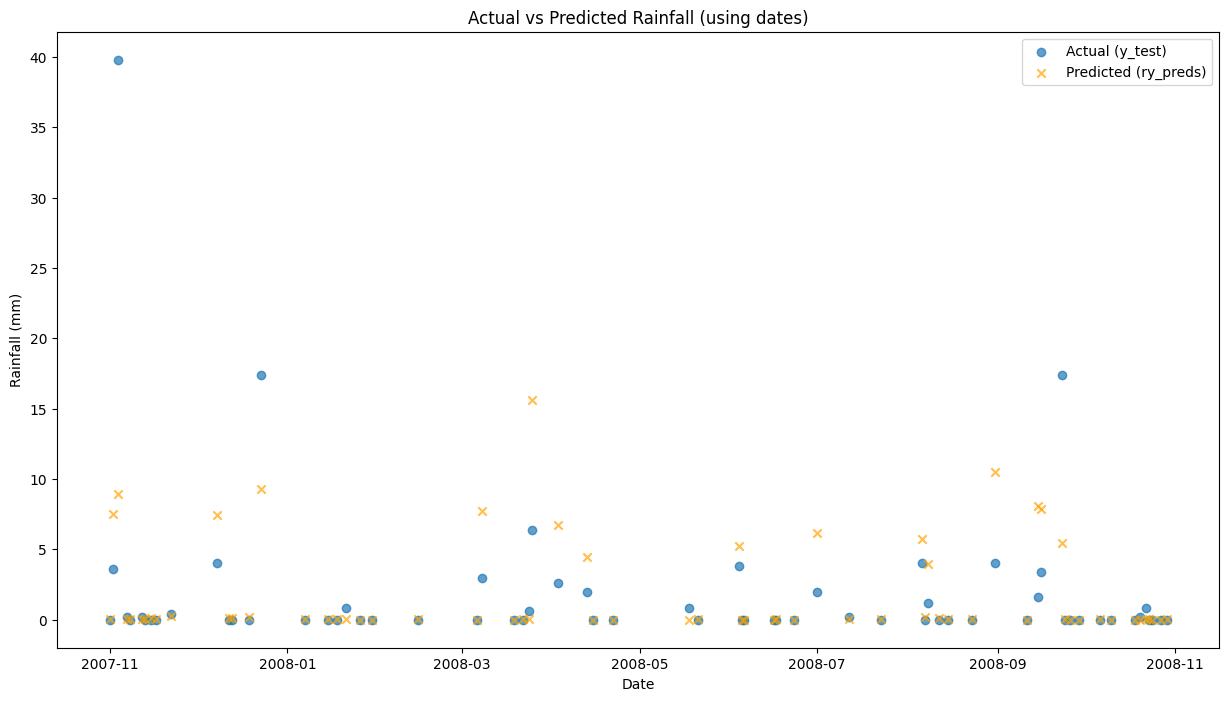

In [76]:
plt.figure(figsize=(15, 8))

# 실제값
plt.scatter(dates_test, y_test, label="Actual (y_test)", alpha=0.7)

# 예측값 (주황색)
plt.scatter(dates_test, ry_preds, c="orange", label="Predicted (ry_preds)", alpha=0.7, marker="x")

plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")  # y축은 강우량 기준
plt.title("Actual vs Predicted Rainfall (using dates)")
plt.legend()
plt.show()

In [87]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)


# --- MSE 계산 ---
mse = mean_squared_error(y_test, dy_preds)
print("MSE(평균제곱근오차):", mean_squared_error(y_test, dy_preds))  #평가
# --- RMSE 직접 계산 (수동) ---
rmse = np.sqrt(mse)
print("RMSE:", rmse)


MSE(평균제곱근오차): 28.6430303030303
RMSE: 5.351918375968593


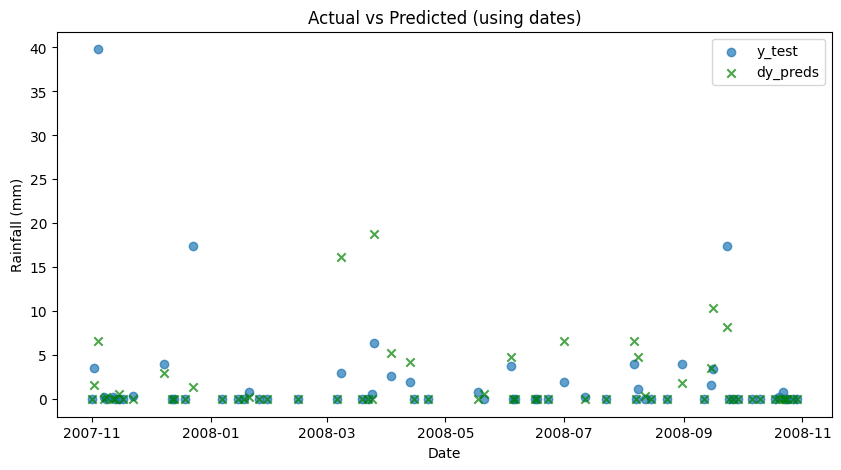

In [88]:
plt.figure(figsize=(10, 5))

# 실제값
plt.scatter(dates_test, y_test, label="y_test", alpha=0.7)

# 예측값 (초록색)
plt.scatter(dates_test, dy_preds, c="g", label="dy_preds", alpha=0.7, marker="x")

plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")  # 데이터 맞게 y축 라벨 조정
plt.title("Actual vs Predicted (using dates)")
plt.legend()
plt.show()
